In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import streamlit as st
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


# Data Cleaning

In [6]:
new_df = df.head(10000)

In [7]:
new_df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                622
Amount                  622
ship-city                 5
ship-state                5
ship-postal-code          5
ship-country              5
B2B                       0
fulfilled-by           6320
New                   10000
PendingS              10000
dtype: int64

### Dropped the columns which have no values

In [8]:
new_df.drop(columns=["New","PendingS"],inplace=True)

In [9]:
new_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9994,402-4344032-6238709,04-24-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,1,INR,406.00,REWA,MADHYA PRADESH,486001.0,IN,False,NaN
9996,9995,405-3106762-7386706,04-24-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XS,Shipped,1,INR,419.00,PONDA,GOA,403401.0,IN,False,NaN
9997,9996,406-8059435-2828355,04-24-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,1112.00,HYDERABAD,TELANGANA,500050.0,IN,False,NaN
9998,9997,404-1763155-3417157,04-24-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,L,On the Way,0,INR,325.71,HYDERABAD,TELANGANA,500068.0,IN,False,Easy Ship


In [10]:
new_df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency               622
Amount                 622
ship-city                5
ship-state               5
ship-postal-code         5
ship-country             5
B2B                      0
fulfilled-by          6320
dtype: int64

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               10000 non-null  int64  
 1   Order ID            10000 non-null  object 
 2   Date                10000 non-null  object 
 3   Status              10000 non-null  object 
 4   Fulfilment          10000 non-null  object 
 5   Sales Channel       10000 non-null  object 
 6   ship-service-level  10000 non-null  object 
 7   Category            10000 non-null  object 
 8   Size                10000 non-null  object 
 9   Courier Status      10000 non-null  object 
 10  Qty                 10000 non-null  int64  
 11  currency            9378 non-null   object 
 12  Amount              9378 non-null   float64
 13  ship-city           9995 non-null   object 
 14  ship-state          9995 non-null   object 
 15  ship-postal-code    9995 non-null   float64
 16  ship-

In [12]:
mode_df = new_df["currency"].mode()
mode_df

0    INR
Name: currency, dtype: object

In [13]:
new_df["currency"]=new_df["currency"].fillna("INR")

In [14]:
mean_amount = new_df["Amount"].mean()
mean_amount

623.2403721475794

In [15]:
new_df["Amount"] = new_df["Amount"].fillna(mean_amount)

#### cheking if the null values have been filled in the amount and currency columns

In [16]:
new_df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                   0
ship-city                5
ship-state               5
ship-postal-code         5
ship-country             5
B2B                      0
fulfilled-by          6320
dtype: int64

In [17]:
mode_fullfileed_by = new_df["fulfilled-by"].mode()
mode_fullfileed_by

0    Easy Ship
Name: fulfilled-by, dtype: object

In [18]:
new_df["fulfilled-by"]=new_df["fulfilled-by"].fillna(mode_fullfileed_by[0])

In [19]:
new_df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             5
ship-state            5
ship-postal-code      5
ship-country          5
B2B                   0
fulfilled-by          0
dtype: int64

### We can drop the null value coulmns in ship-city,ship-state,ship-postal-code,ship-country as it has only five null values

In [20]:
new_df.dropna(subset=["ship-city","ship-state","ship-postal-code","ship-country"],inplace=True)

In [21]:
new_df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [22]:
new_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9994,402-4344032-6238709,04-24-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,1,INR,406.00,REWA,MADHYA PRADESH,486001.0,IN,False,Easy Ship
9996,9995,405-3106762-7386706,04-24-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XS,Shipped,1,INR,419.00,PONDA,GOA,403401.0,IN,False,Easy Ship
9997,9996,406-8059435-2828355,04-24-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,1112.00,HYDERABAD,TELANGANA,500050.0,IN,False,Easy Ship
9998,9997,404-1763155-3417157,04-24-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,L,On the Way,0,INR,325.71,HYDERABAD,TELANGANA,500068.0,IN,False,Easy Ship


### Renaming the columns

In [23]:
new_df.rename(columns={
    "ship-service-level":"Service-level",
    "currency":"Currency",
    "ship-city":"City",
    "ship-state":"State",
    "ship-postal-code":"Postal-Code",
    "ship-country":"Country",
    "fullfiled_by":"Fulfilled-by"
},inplace=True)

In [24]:
new_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,Service-level,Category,Size,Courier Status,Qty,Currency,Amount,City,State,Postal-Code,Country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Easy Ship


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9995 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9995 non-null   int64  
 1   Order ID        9995 non-null   object 
 2   Date            9995 non-null   object 
 3   Status          9995 non-null   object 
 4   Fulfilment      9995 non-null   object 
 5   Sales Channel   9995 non-null   object 
 6   Service-level   9995 non-null   object 
 7   Category        9995 non-null   object 
 8   Size            9995 non-null   object 
 9   Courier Status  9995 non-null   object 
 10  Qty             9995 non-null   int64  
 11  Currency        9995 non-null   object 
 12  Amount          9995 non-null   float64
 13  City            9995 non-null   object 
 14  State           9995 non-null   object 
 15  Postal-Code     9995 non-null   float64
 16  Country         9995 non-null   object 
 17  B2B             9995 non-null   bool  

### Changing the columns to appropriate Data types

In [26]:
new_df["Date"] = pd.to_datetime(new_df["Date"],format="mixed")

In [27]:
new_df["Postal-Code"]=new_df["Postal-Code"].astype(int)

### Setting the index column as the new index

In [28]:
new_df.set_index("index",inplace=True)

In [29]:
new_df

,Order ID,Date,Status,Fulfilment,Sales Channel,Service-level,Category,Size,Courier Status,Qty,Currency,Amount,City,State,Postal-Code,Country,B2B,fulfilled-by
index,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,Easy Ship
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,402-4344032-6238709,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,1,INR,406.00,REWA,MADHYA PRADESH,486001,IN,False,Easy Ship
9995,405-3106762-7386706,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,Shirt,XS,Shipped,1,INR,419.00,PONDA,GOA,403401,IN,False,Easy Ship
9996,406-8059435-2828355,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,1112.00,HYDERABAD,TELANGANA,500050,IN,False,Easy Ship


In [30]:
new_df.to_csv("Amazon Sale Report Cleaned.csv")

### Statistical Analsyis

In [31]:
new_df.describe()

,Date,Qty,Amount,Postal-Code
count,9995,9995.000000,9995.000000,9995.000000
mean,2022-04-27 02:32:34.337168640,0.897949,623.318631,464645.721361
min,2022-04-24 00:00:00,0.000000,0.000000,110001.000000
25%,2022-04-25 00:00:00,1.000000,442.000000,382335.000000
50%,2022-04-27 00:00:00,1.000000,597.000000,500028.000000
75%,2022-04-29 00:00:00,1.000000,744.000000,600021.000000
max,2022-04-30 00:00:00,15.000000,2224.000000,989898.000000
std,NaN,0.375334,263.562128,192421.806418


From this we can infer that 50% of the people place order of amount more than 500 Rupees and 75% place order items worth more than 700 Rupees,
and on an average people order products worth more than 600 Rupees and can deviate from that either 200 rupees more or less.

### Visualisation

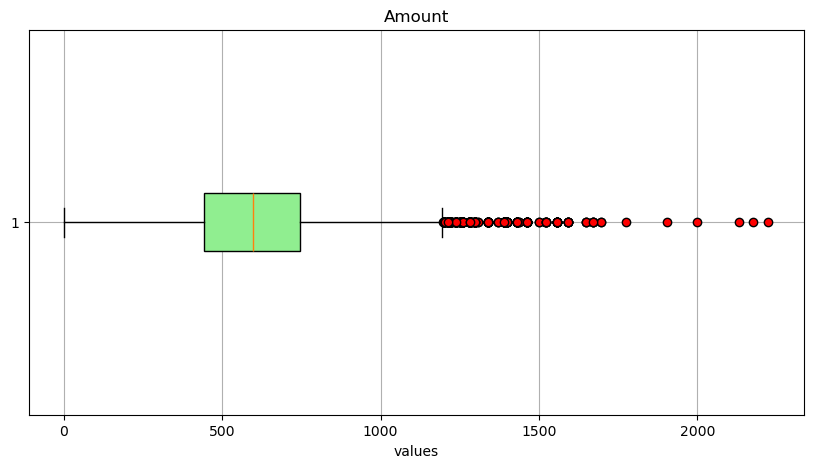

In [32]:
plt.figure(figsize=(10,5))
plt.boxplot(new_df["Amount"],vert=False,patch_artist=True,boxprops={"facecolor":"lightgreen"},flierprops={"marker":"o","markerfacecolor":"red","markeredgecolor":"black"})
plt.xlabel("values")
plt.title("Amount")
plt.grid(True)
plt.show()

### Loading of the New Cleaned Dataset

In [33]:
df = pd.read_csv("Amazon Sale Report Cleaned.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,Service-level,Category,Size,Courier Status,Qty,Currency,Amount,City,State,Postal-Code,Country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,Easy Ship


#### 1. What is the distribution of order statuses (e.g., shipped, cancelled)?

Courier Status
Shipped       8546
On the Way     641
Cancelled      438
Unshipped      370
Name: count, dtype: int64


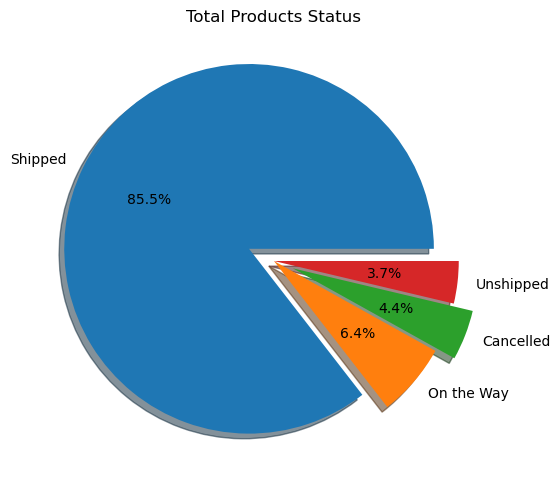

In [34]:
print(df["Courier Status"].value_counts())
categories = ["Shipped","On the Way","Cancelled","Unshipped"]
products_sales = [8546,641,438,370]
plt.figure(figsize=(10,6))
plt.pie(products_sales,labels=categories,explode=[0.15,0,0.11,0],shadow=True,autopct="%1.1f%%")
plt.title("Total Products Status")
plt.show()

#### 2. Which categories have the highest number of cancelled orders?

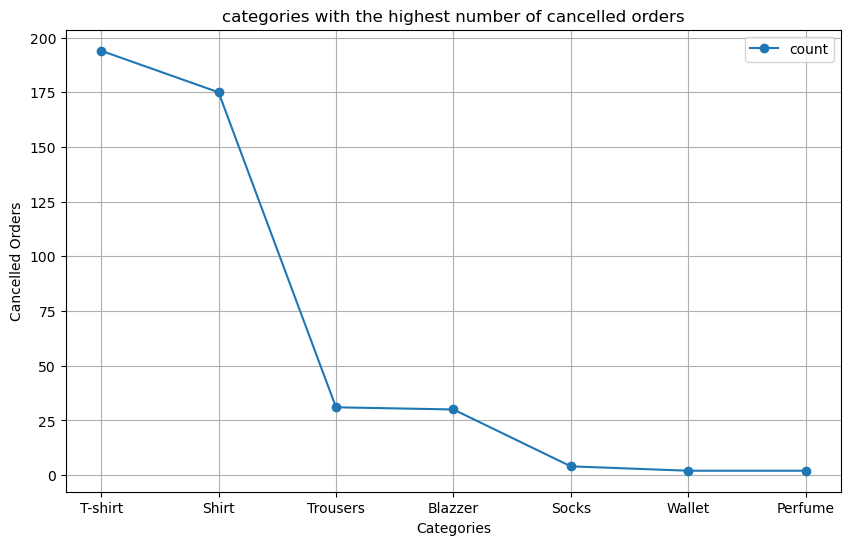

In [35]:
plt.figure(figsize=(10,6))
df[df["Courier Status"]=="Cancelled"]["Category"].value_counts().plot(kind="line",marker="o")
plt.title("categories with the highest number of cancelled orders")
plt.xlabel("Categories")
plt.ylabel("Cancelled Orders")
plt.grid(True)
plt.legend()
plt.show()

#### 3.What is the monthly trend of sales over time?

#### 4. Which cities have the highest sales volume?

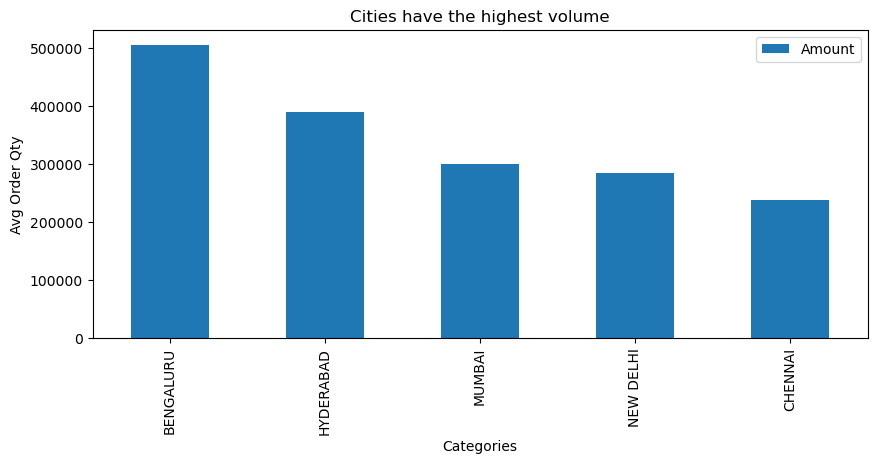

In [36]:
plt.figure(figsize=(10,4))
city_sales = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head().plot(kind="bar")
plt.title("Cities have the highest volume")
plt.xlabel("Categories")
plt.ylabel("Avg Order Qty")
plt.legend()
plt.show()

#### 5. What is the average order quantity across different categories?

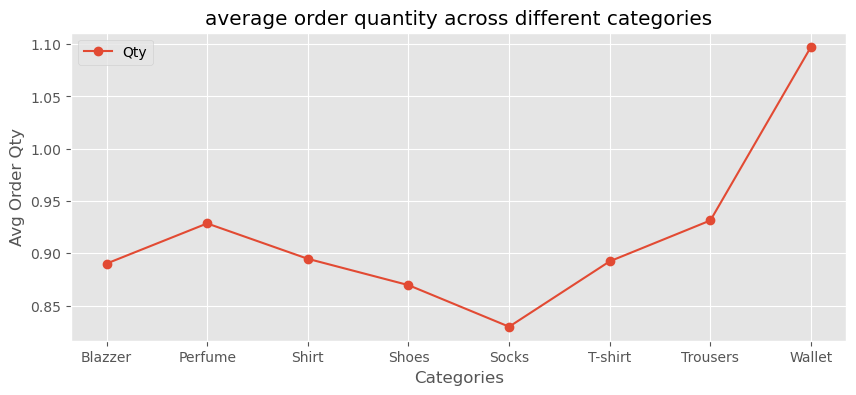

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(10,4))
df.groupby("Category")["Qty"].mean().plot(kind="line",marker="o")
plt.title("average order quantity across different categories")
plt.xlabel("Categories")
plt.ylabel("Avg Order Qty")
plt.grid(True)
plt.legend()
plt.show()

#### 6. How many orders are fulfilled by "Amazon" vs "Merchant"?

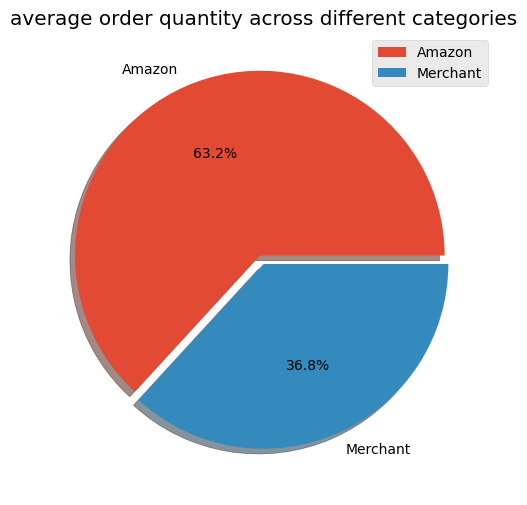

In [38]:
plt.figure(figsize=(10,6))
fulfilment_status = df["Fulfilment"].value_counts()
plt.pie(fulfilment_status,labels=fulfilment_status.index,explode=[0.05,0],shadow=True,autopct="%1.1f%%")
plt.title("average order quantity across different categories")
plt.grid(True)
plt.legend()
plt.show()

#### 7. What is the correlation between order amount and quantity?

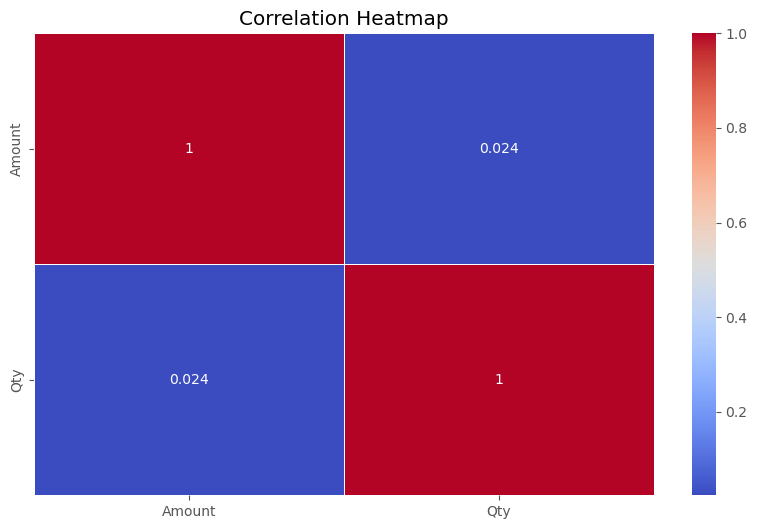

In [39]:
corr_matrix = df[['Amount', 'Qty']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### 8. Which shipping service level is most frequently used?

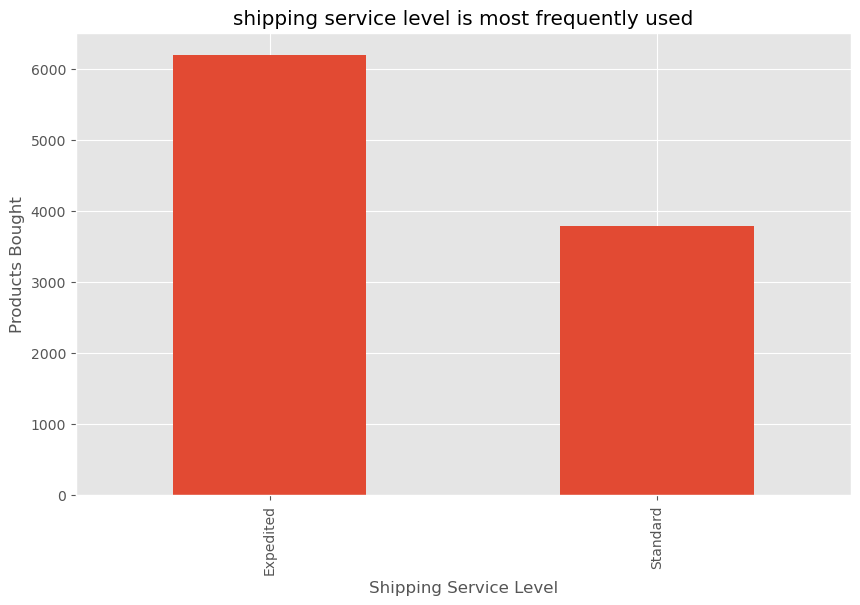

In [40]:
plt.figure(figsize=(10,6))
df["Service-level"].sort_values(ascending=False).value_counts().head().plot(kind="bar")
plt.title("shipping service level is most frequently used")
plt.xlabel("Shipping Service Level")
plt.ylabel("Products Bought")
plt.show()

#### 9. What percentage of orders are B2B vs non-B2B?

In [41]:
count_percentage = df["B2B"].value_counts()

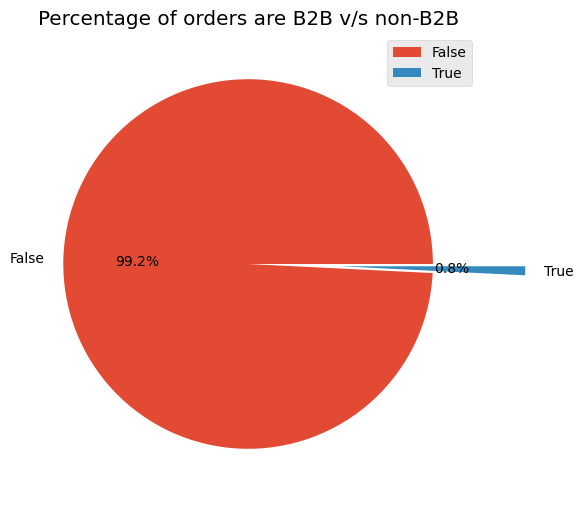

In [42]:
plt.figure(figsize=(10,6))
plt.pie(count_percentage,labels=count_percentage.index,explode=[0,0.5],shadow=False,autopct="%1.1f%%")
plt.title("Percentage of orders are B2B v/s non-B2B")
plt.legend()
plt.show()

#### 10. How often are expedited shipping options chosen?

In [43]:
(df["Service-level"].value_counts()/df.shape[0]*100)

Service-level
Expedited    62.051026
Standard     37.948974
Name: count, dtype: float64

#### 62% orders are expedited and 38% orders are shipped

#### 11. Which regions/states contribute the most to sales?

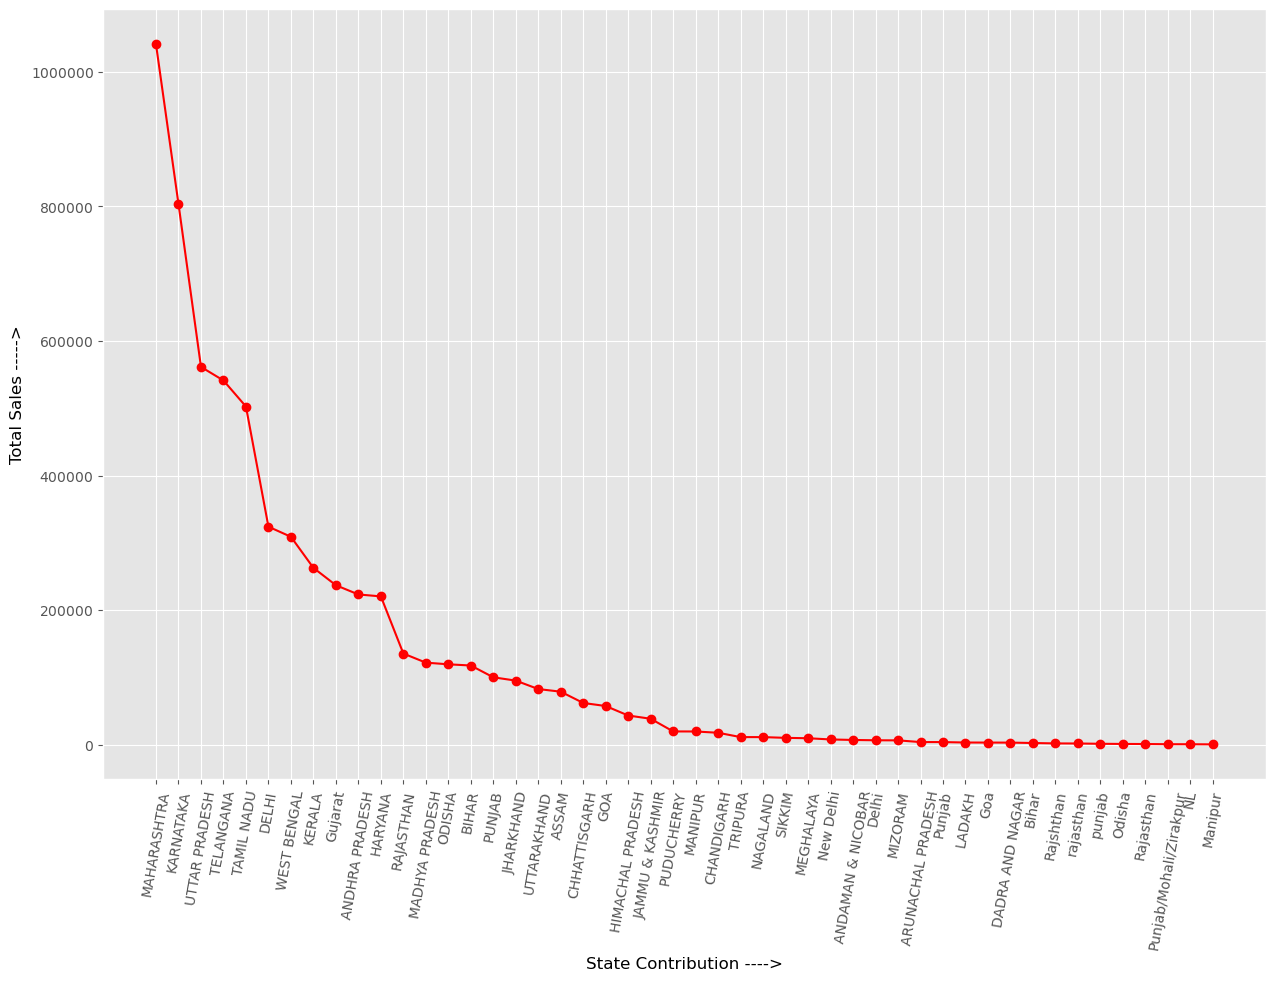

In [44]:
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(15,10))
statewise_amount = df.groupby("State")["Amount"].sum().astype("float").sort_values(ascending=False)
plt.plot(statewise_amount,color="r",marker="o")
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=80)
plt.xlabel("State Contribution ---->",color="black",loc="center")
plt.ylabel("Total Sales ----->",color="black",loc="center")
plt.grid(True)
plt.show()

#### 12. How many fulfilled orders were shipped but returned or cancelled?

In [45]:
df["Status"].value_counts()

Status
Shipped                         5528
Shipped - Delivered to Buyer    2818
Cancelled                       1428
Shipped - Returned to Seller     217
Shipped - Rejected by Buyer        2
Shipped - Lost in Transit          2
Name: count, dtype: int64

In [46]:
df[df["Courier Status"]=="Shipped"].shape[0]

8546

In [47]:
(df[(df["Courier Status"]=="Shipped")&(df["Status"]=="Shipped - Returned to Seller")]["Status"].value_counts()/df[df["Courier Status"]=="Shipped"].shape[0]) *100

Status
Shipped - Returned to Seller   2.54
Name: count, dtype: float64

#### As we can see out of 8546 orders, 217 orders  were shipped and then returned or in other words 2.54% orders were shipped and then returned

#### 13. What is the distribution of order amounts? 

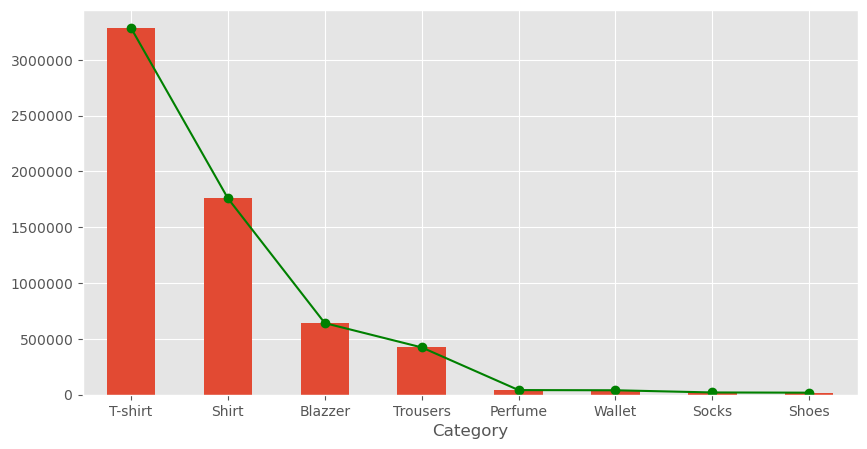

In [48]:
plt.figure(figsize=(10,5))
df.groupby("Category")["Amount"].sum().sort_values(ascending=False).plot(kind="bar")
df.groupby("Category")["Amount"].sum().sort_values(ascending=False).plot(kind="line",marker="o",color="g")
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)

#### 14. Are larger sizes of items (e.g., XL, 3XL) correlated with higher return rates?

##### mapped the size column to numerical values in order to plot the graph

In [49]:
size_map = {
    "XS":0,
    "S":1,
    "M":2,
    "L":3,
    "XL":4,
    "XXL":5,
    "3XL":6,
    "4XL":7,
    "5Xl":8,
    "6XL":9,
    "Free":10
}
df["Size_numeric"] = df["Size"].map(size_map)

In [50]:
df["Size"].value_counts()

Size
M       1750
XL      1685
L       1615
XXL     1382
S       1301
3XL     1172
XS       896
Free     161
6XL       16
5XL       14
4XL        3
Name: count, dtype: int64

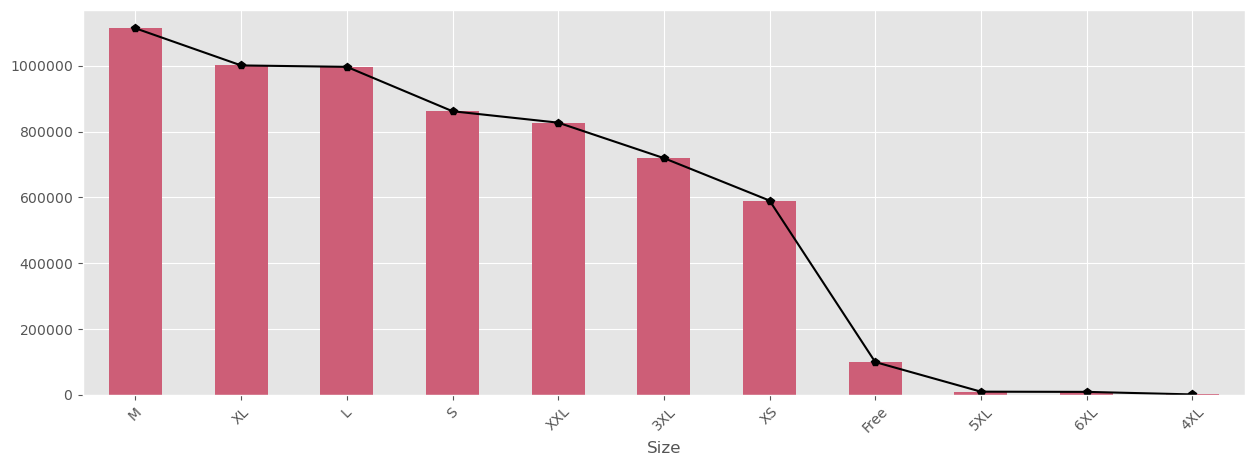

In [51]:
plt.figure(figsize=(15,5))
df.groupby("Size")["Amount"].sum().sort_values(ascending=False).plot(kind="line",marker="p",color="black")
df.groupby("Size")["Amount"].sum().sort_values(ascending=False).plot(kind="bar",color="#CD5E77")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)

#### 15. Which city/state has the highest return or cancelled rate?

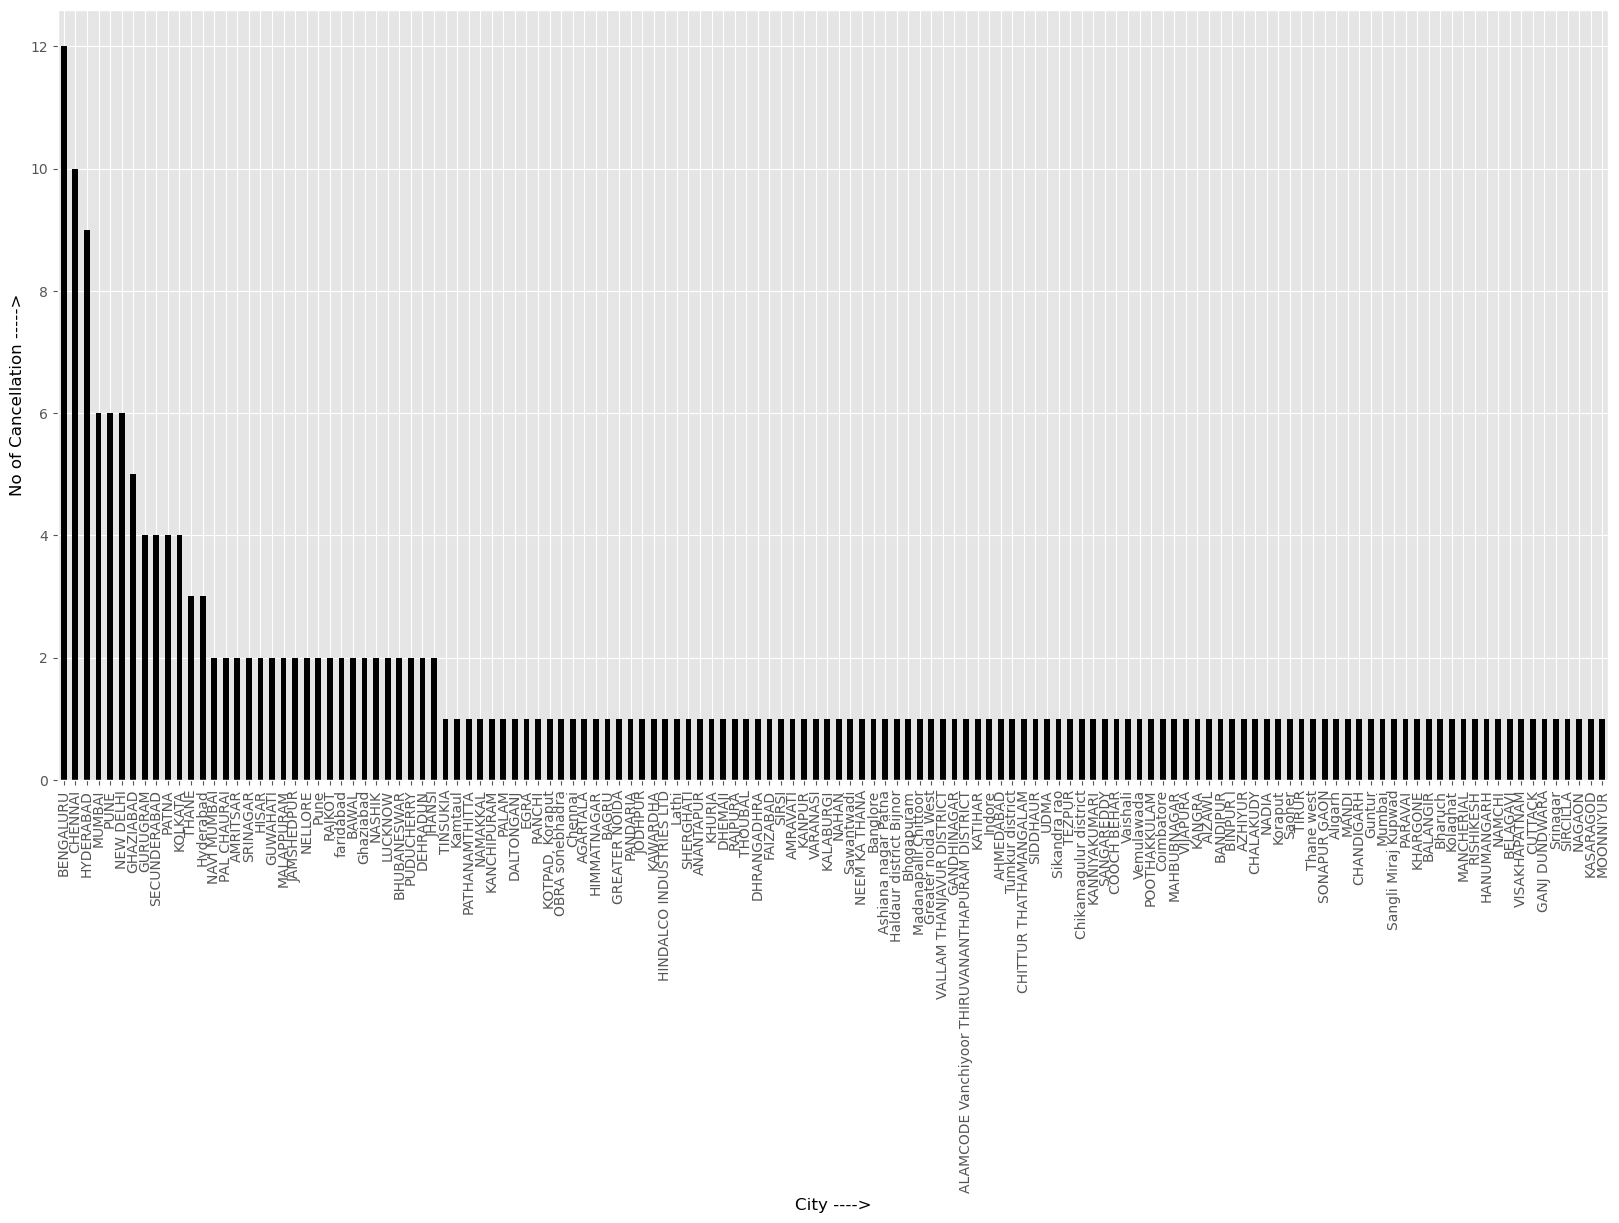

In [52]:
plt.figure(figsize=(20,10))
df[df["Status"]=="Shipped - Returned to Seller"]["City"].value_counts().sort_values(ascending=False).plot(kind="bar",color="black")
plt.xlabel("City ---->",color="black",loc="center")
plt.ylabel("No of Cancellation ----->",color="black",loc="center")
plt.grid(True)
plt.show()

#### 16. Which city/state has the highest return?

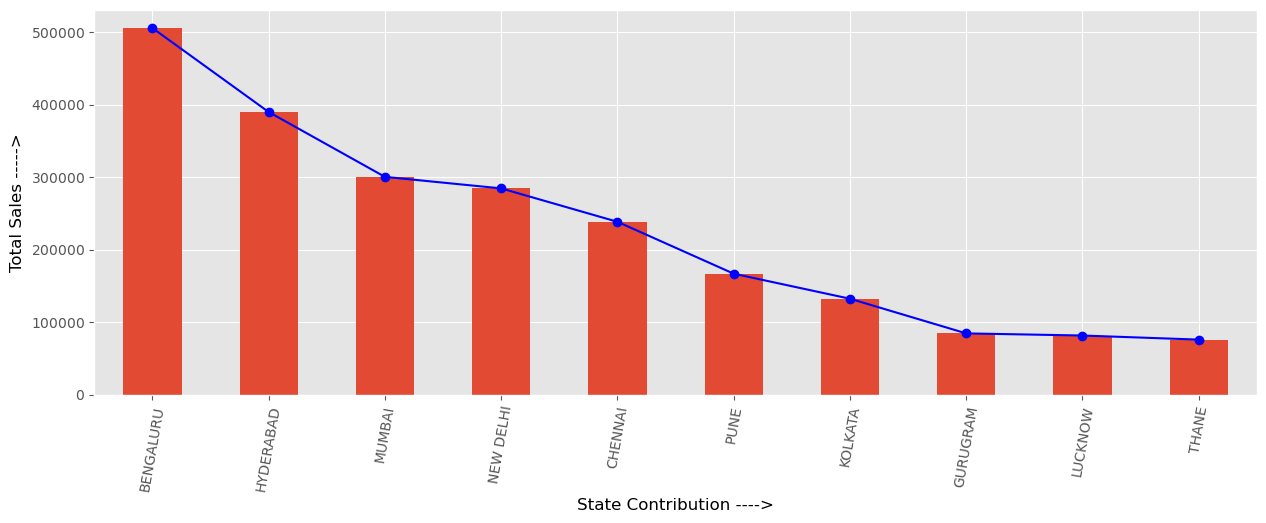

In [53]:
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(15,5))
citywise_amount = df.groupby("City")["Amount"].sum().astype("float").sort_values(ascending=False).head(10)
plt.plot(citywise_amount,color="b",marker="o")
citywise_amount.plot(kind="bar")
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=80)
plt.xlabel("State Contribution ---->",color="black",loc="center")
plt.ylabel("Total Sales ----->",color="black",loc="center")
plt.grid(True)
plt.show()

#### 17. What is the ratio of Amazon-fulfilled to merchant-fulfilled orders?


In [54]:
df.groupby("Fulfilment")["Fulfilment"].value_counts()[0]/df.groupby("Fulfilment")["Fulfilment"].value_counts()[1]

1.716032608695652

#### 18. What is the total revenue generated by B2B sales vs non-B2B?

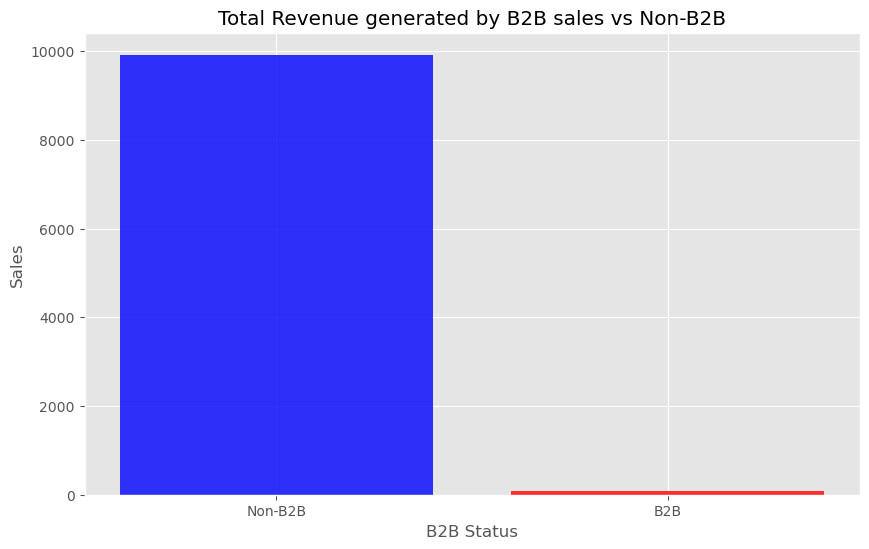

In [55]:
categories = ["Non-B2B", "B2B"]
values = [df.groupby("B2B")["B2B"].value_counts()[0], df.groupby("B2B")["B2B"].value_counts()[1]]
colors = ["blue", "red"]
plt.figure(figsize=(10,6))
bars = plt.bar(categories, values, color=colors, alpha=0.8)
plt.xlabel("B2B Status")
plt.ylabel("Sales")
plt.title("Total Revenue generated by B2B sales vs Non-B2B")
plt.show()

#### 19. How does the quantity sold differ across various categories? 

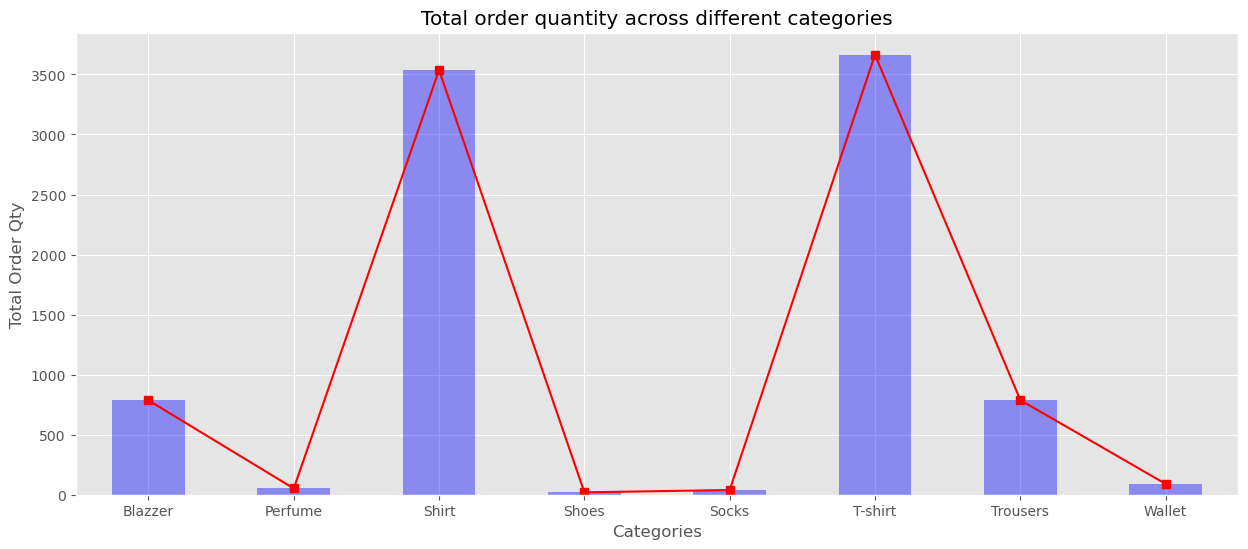

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(15,6))
df.groupby("Category")["Qty"].sum().plot(kind="bar",color="b",alpha=0.4)
df.groupby("Category")["Qty"].sum().plot(kind="line",marker="s",color="r")
plt.title("Total order quantity across different categories")
plt.xlabel("Categories")
plt.ylabel("Total Order Qty")
plt.grid(True)
plt.show()

##### 20. What are the top states for fulfilling orders based on postal codes?

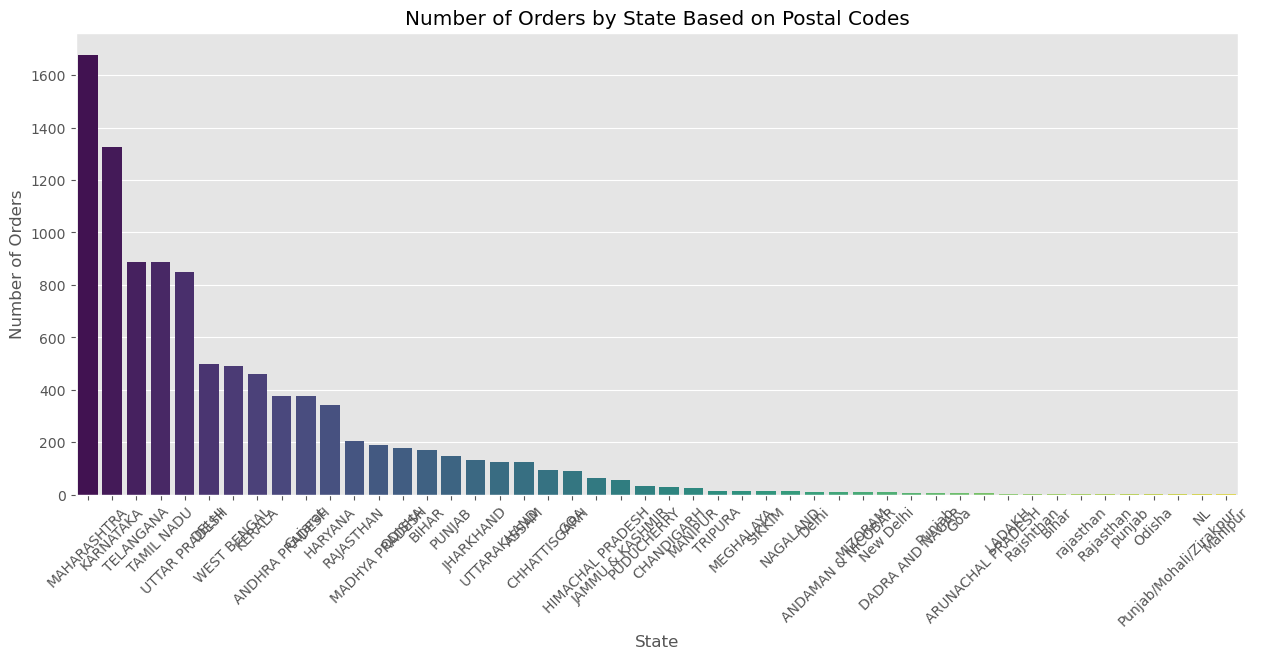

In [57]:
df['Postal-Code'] = df['Postal-Code'].astype(str)
postal_code_counts = df.groupby(['State', 'Postal-Code']).size().reset_index(name='Order Count')
state_order_counts = postal_code_counts.groupby('State')['Order Count'].sum().sort_values(ascending=False)
state_order_counts_df = state_order_counts.reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='State', y='Order Count', data=state_order_counts_df, palette='viridis')
plt.title('Number of Orders by State Based on Postal Codes')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  
plt.show()

#### 21.  What are the sales volume by Country and Category ?

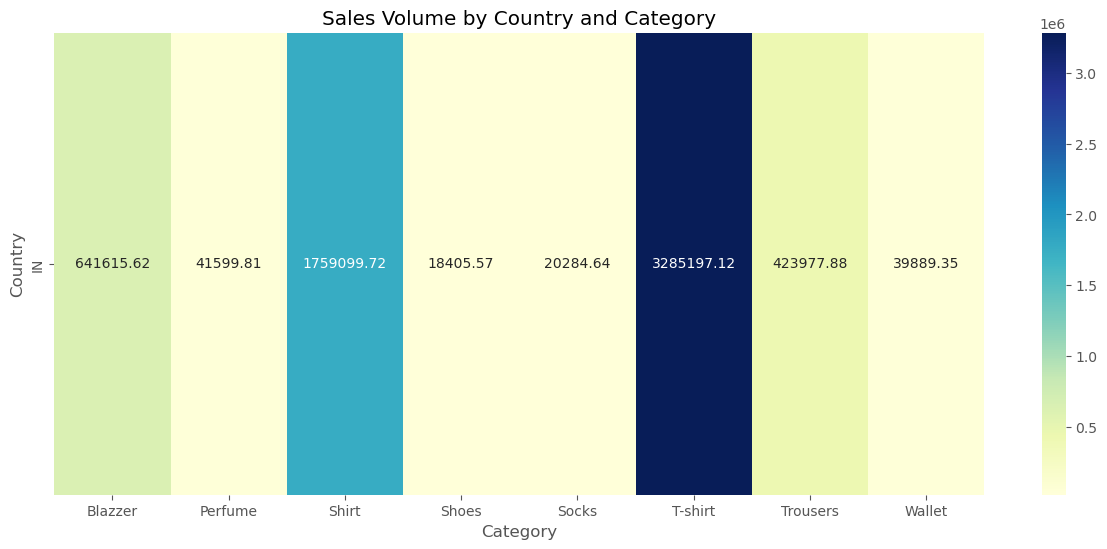

In [58]:
country_category_sales = df.groupby(['Country', 'Category'])['Amount'].sum().unstack()
plt.figure(figsize=(15,6))
sns.heatmap(country_category_sales, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Sales Volume by Country and Category')
plt.xlabel('Category')
plt.ylabel('Country')
plt.show()


#### 22. What is the trend of B2B Sales Over Time by Region?

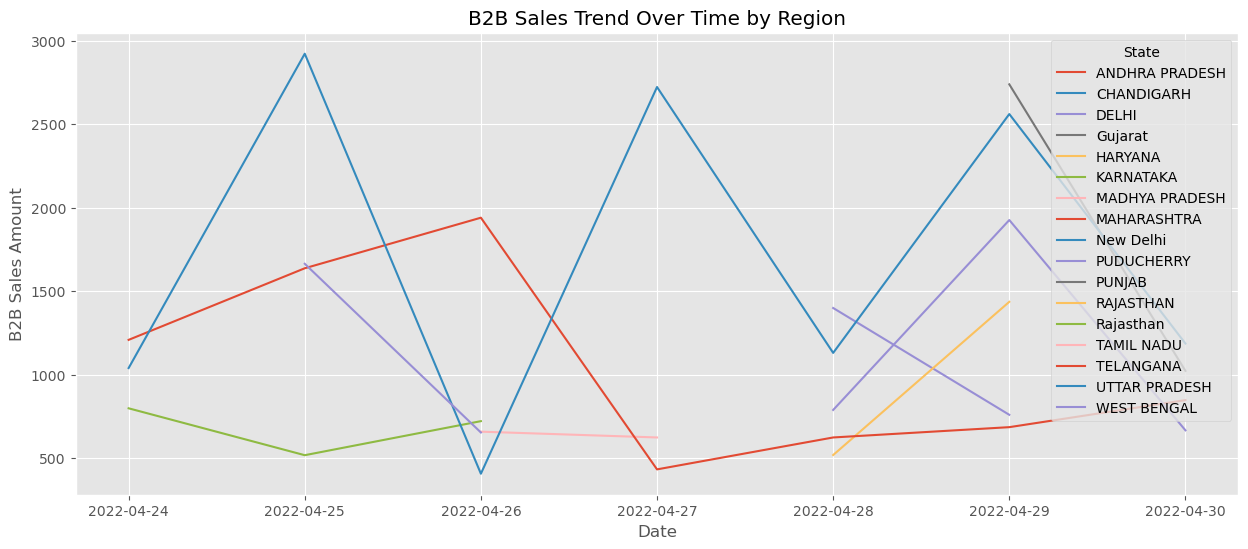

In [59]:

b2b_sales_trend = df[df['B2B']].groupby(['Date', 'State'])['Amount'].sum().unstack()
b2b_sales_trend.plot(figsize=(15,6))
plt.title('B2B Sales Trend Over Time by Region')
plt.xlabel('Date')
plt.ylabel('B2B Sales Amount')
plt.show()


#### 24. What is the Order Quantity Variation by Country and Service-Level?

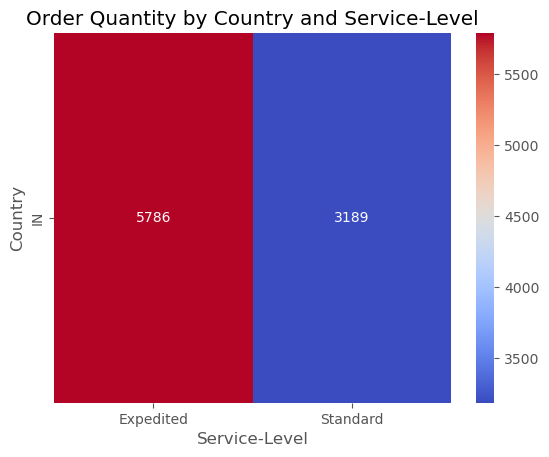

In [60]:
country_service_quantity = df.groupby(['Country', 'Service-level'])['Qty'].sum().unstack()
sns.heatmap(country_service_quantity, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Order Quantity by Country and Service-Level')
plt.xlabel('Service-Level')
plt.ylabel('Country')
plt.show()


#### 25. What is the Item Sizes Sold in Specific Cities?

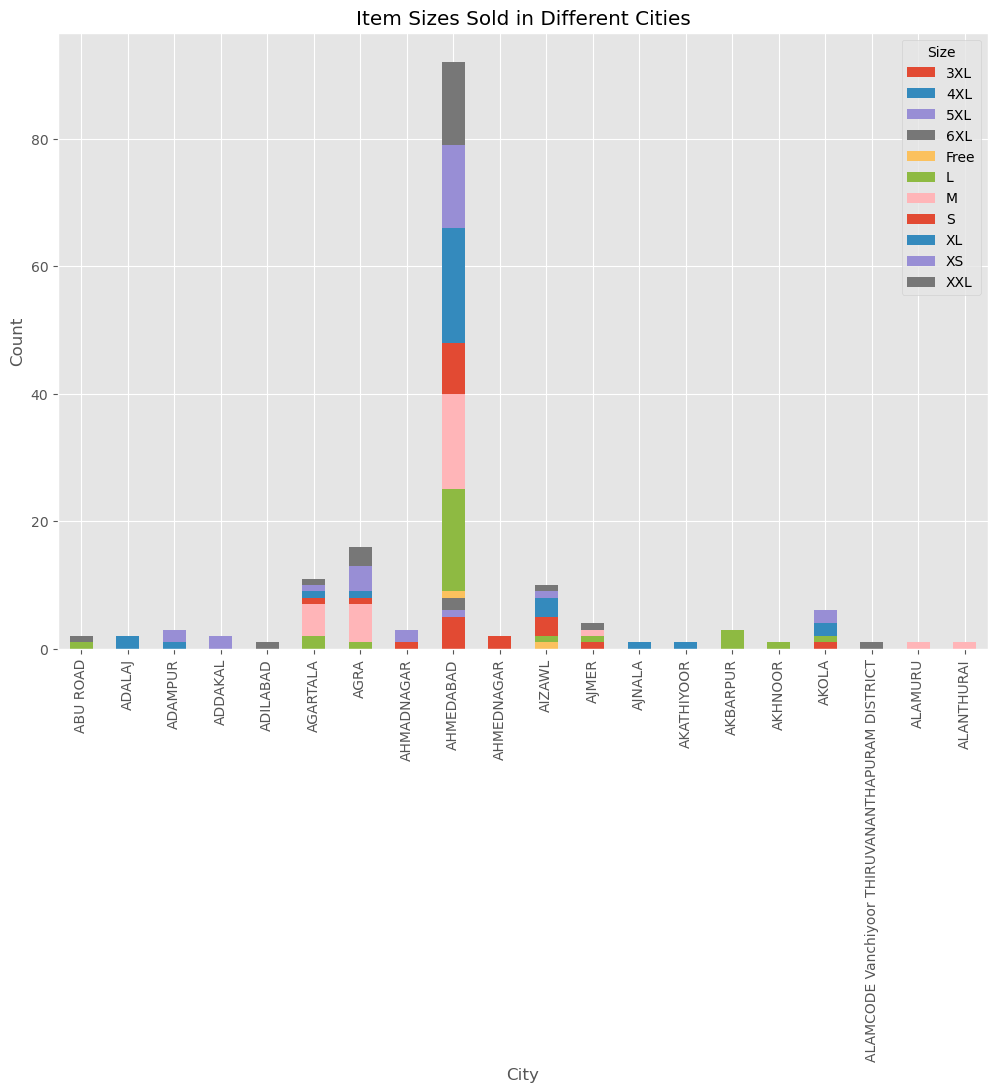

In [61]:

city_size_counts = df.groupby(['City', 'Size']).size().unstack().head(20)
city_size_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Item Sizes Sold in Different Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Size')
plt.show()


#### 26. What is the Average Order Amount and Quantity for Each Category?

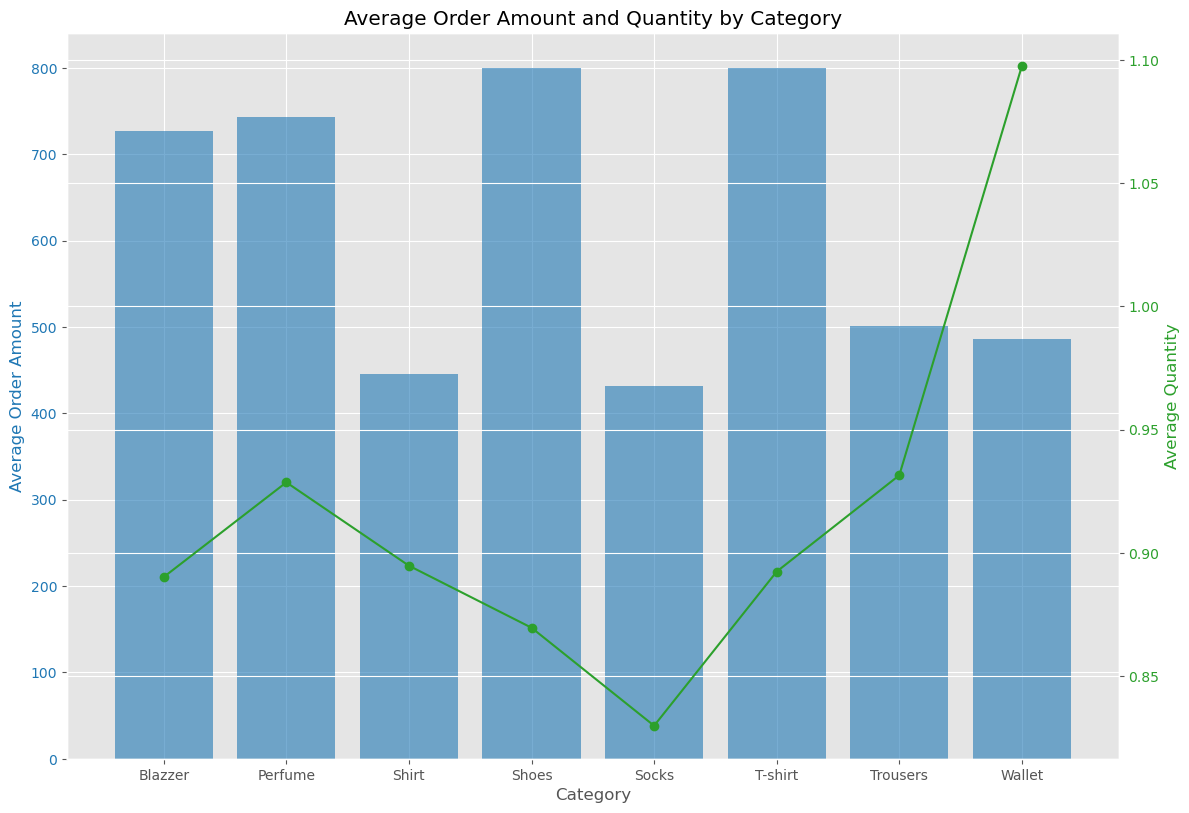

In [62]:
category_avg_amount = df.groupby('Category')['Amount'].mean()
category_avg_qty = df.groupby('Category')['Qty'].mean()
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('Category')
ax1.set_ylabel('Average Order Amount', color=color)
ax1.bar(category_avg_amount.index, category_avg_amount, color=color, alpha=0.6, label='Avg Amount')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Quantity', color=color)
ax2.plot(category_avg_qty.index, category_avg_qty, color=color, marker='o', label='Avg Quantity')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Order Amount and Quantity by Category')
plt.show()


#### 27. What is the Total Sales Amount by Category Over Time ?

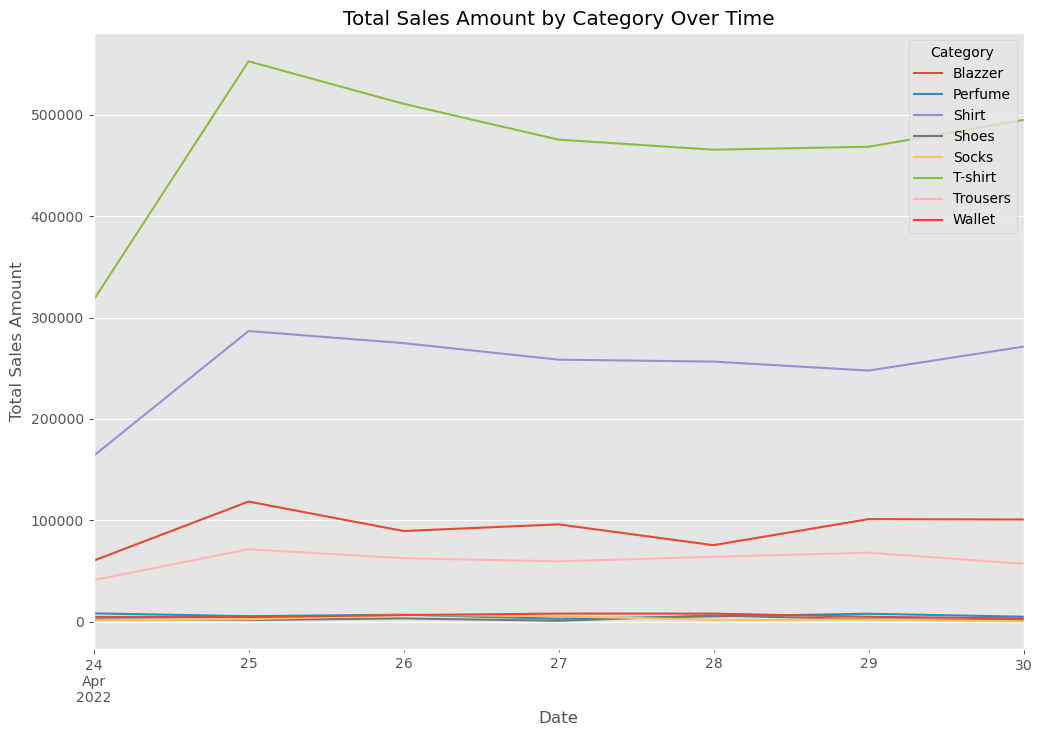

In [63]:
df['Date'] = pd.to_datetime(df['Date'])
category_sales_trend = df.groupby(['Date', 'Category'])['Amount'].sum().unstack()
category_sales_trend.plot(figsize=(12, 8))
plt.title('Total Sales Amount by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend(title='Category')
plt.show()


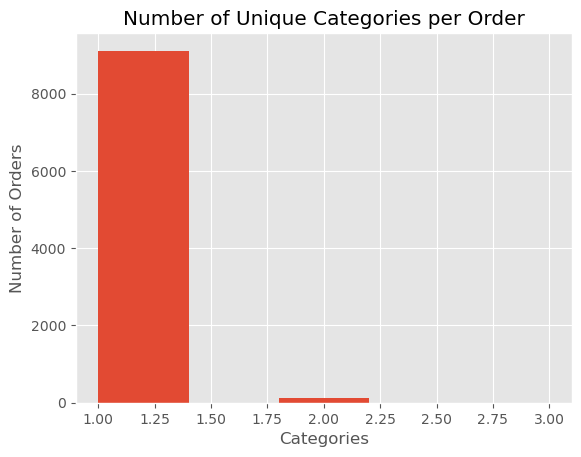

In [83]:
multi_category_orders = df.groupby('Order ID')['Category'].nunique().gt(1).sum()

df.groupby('Order ID')['Category'].nunique().hist(bins=5)
plt.title('Number of Unique Categories per Order')
plt.xlabel('Categories')
plt.ylabel('Number of Orders')
plt.show()


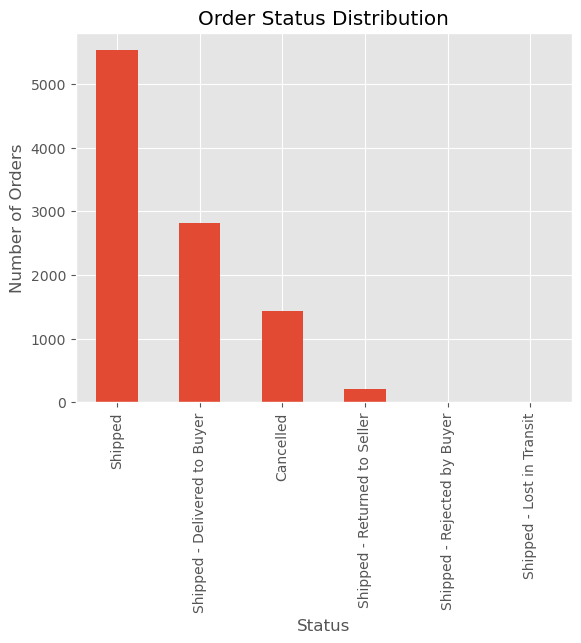

In [73]:
order_status_distribution = df['Status'].value_counts()

order_status_distribution.plot(kind='bar')
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()


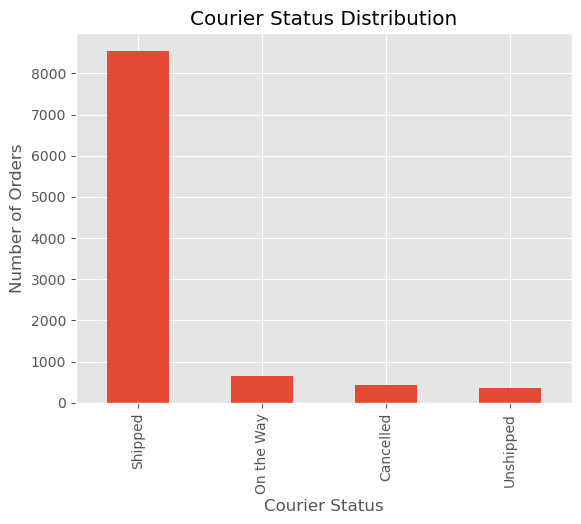

In [74]:
successful_first_attempt_deliveries = df[df['Courier Status'] == 'Delivered']['Courier Status'].count()

df['Courier Status'].value_counts().plot(kind='bar')
plt.title('Courier Status Distribution')
plt.xlabel('Courier Status')
plt.ylabel('Number of Orders')
plt.show()


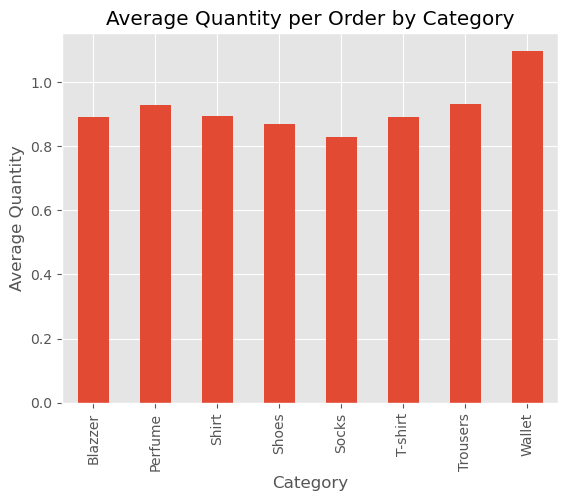

In [77]:
category_multiple_quantities = df.groupby('Category')['Qty'].mean()

category_multiple_quantities.plot(kind='bar')
plt.title('Average Quantity per Order by Category')
plt.xlabel('Category')
plt.ylabel('Average Quantity')
plt.show()


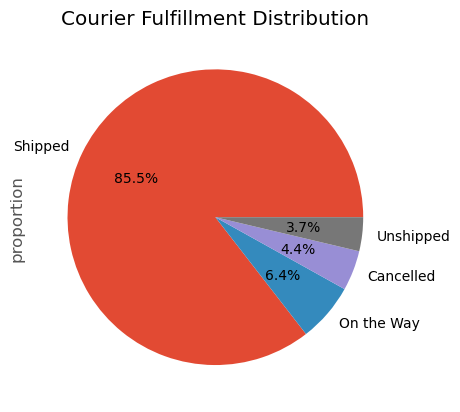

In [88]:
courier_distribution = df['Courier Status'].value_counts(normalize=True) * 100
courier_distribution.plot(kind='pie', title='Courier Fulfillment Distribution', autopct='%1.1f%%')
plt.show()

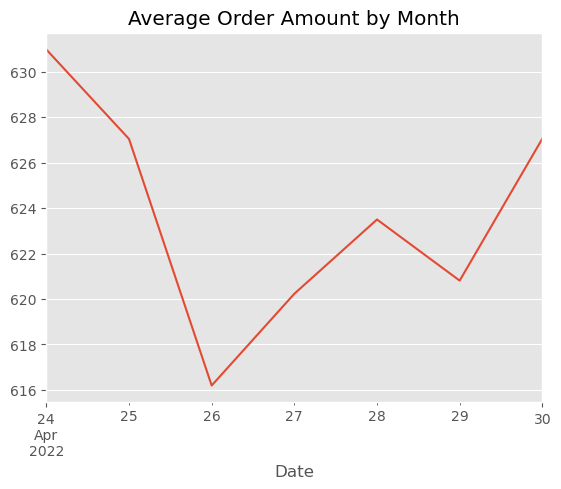

In [90]:
avg_order_amount_monthly = df.groupby('Date')['Amount'].mean()
avg_order_amount_monthly.plot(kind='line', title='Average Order Amount by Date')
plt.show()

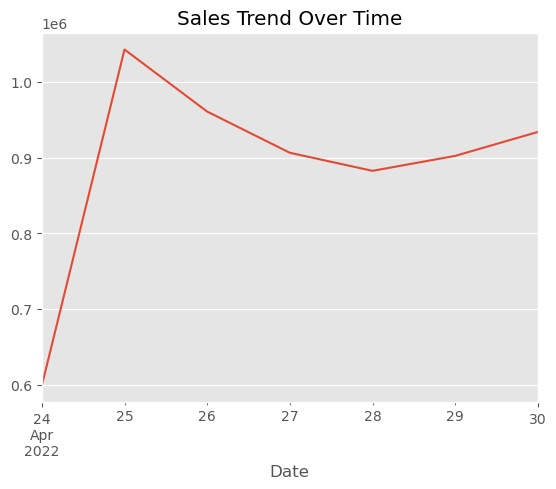

In [91]:
sales_trend = df.groupby('Date')['Amount'].sum()
sales_trend.plot(kind='line', title='Sales Trend Over Time')
plt.show()

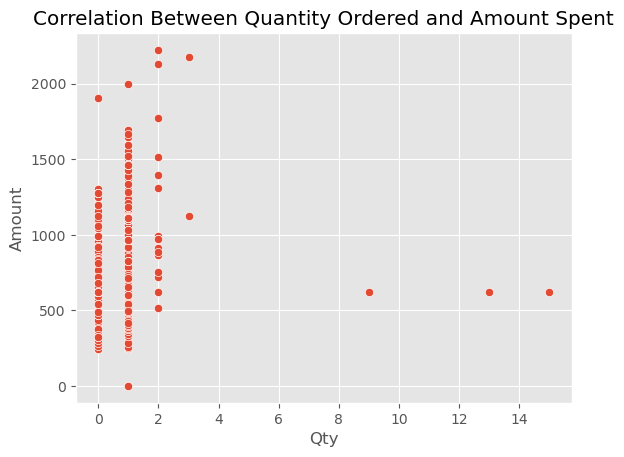

In [96]:
sns.scatterplot(data=df, x='Qty', y='Amount')
plt.title('Correlation Between Quantity Ordered and Amount Spent')
plt.show()

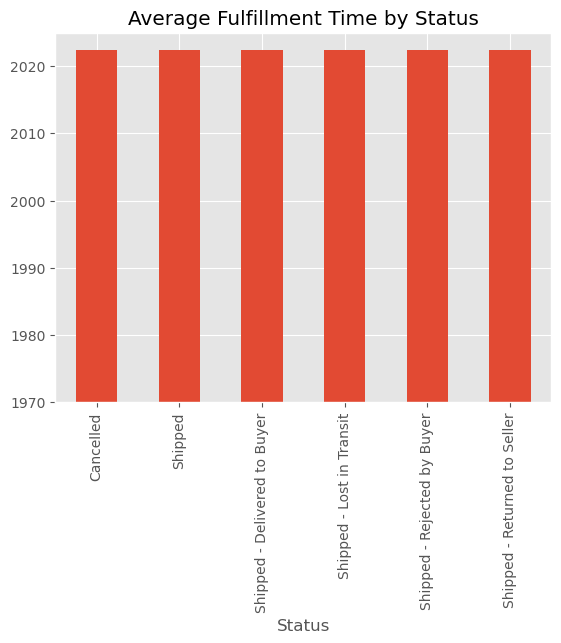

In [97]:
average_fulfillment_time = df.groupby('Status')['Date'].mean()
average_fulfillment_time.plot(kind='bar', title='Average Fulfillment Time by Status')
plt.show()


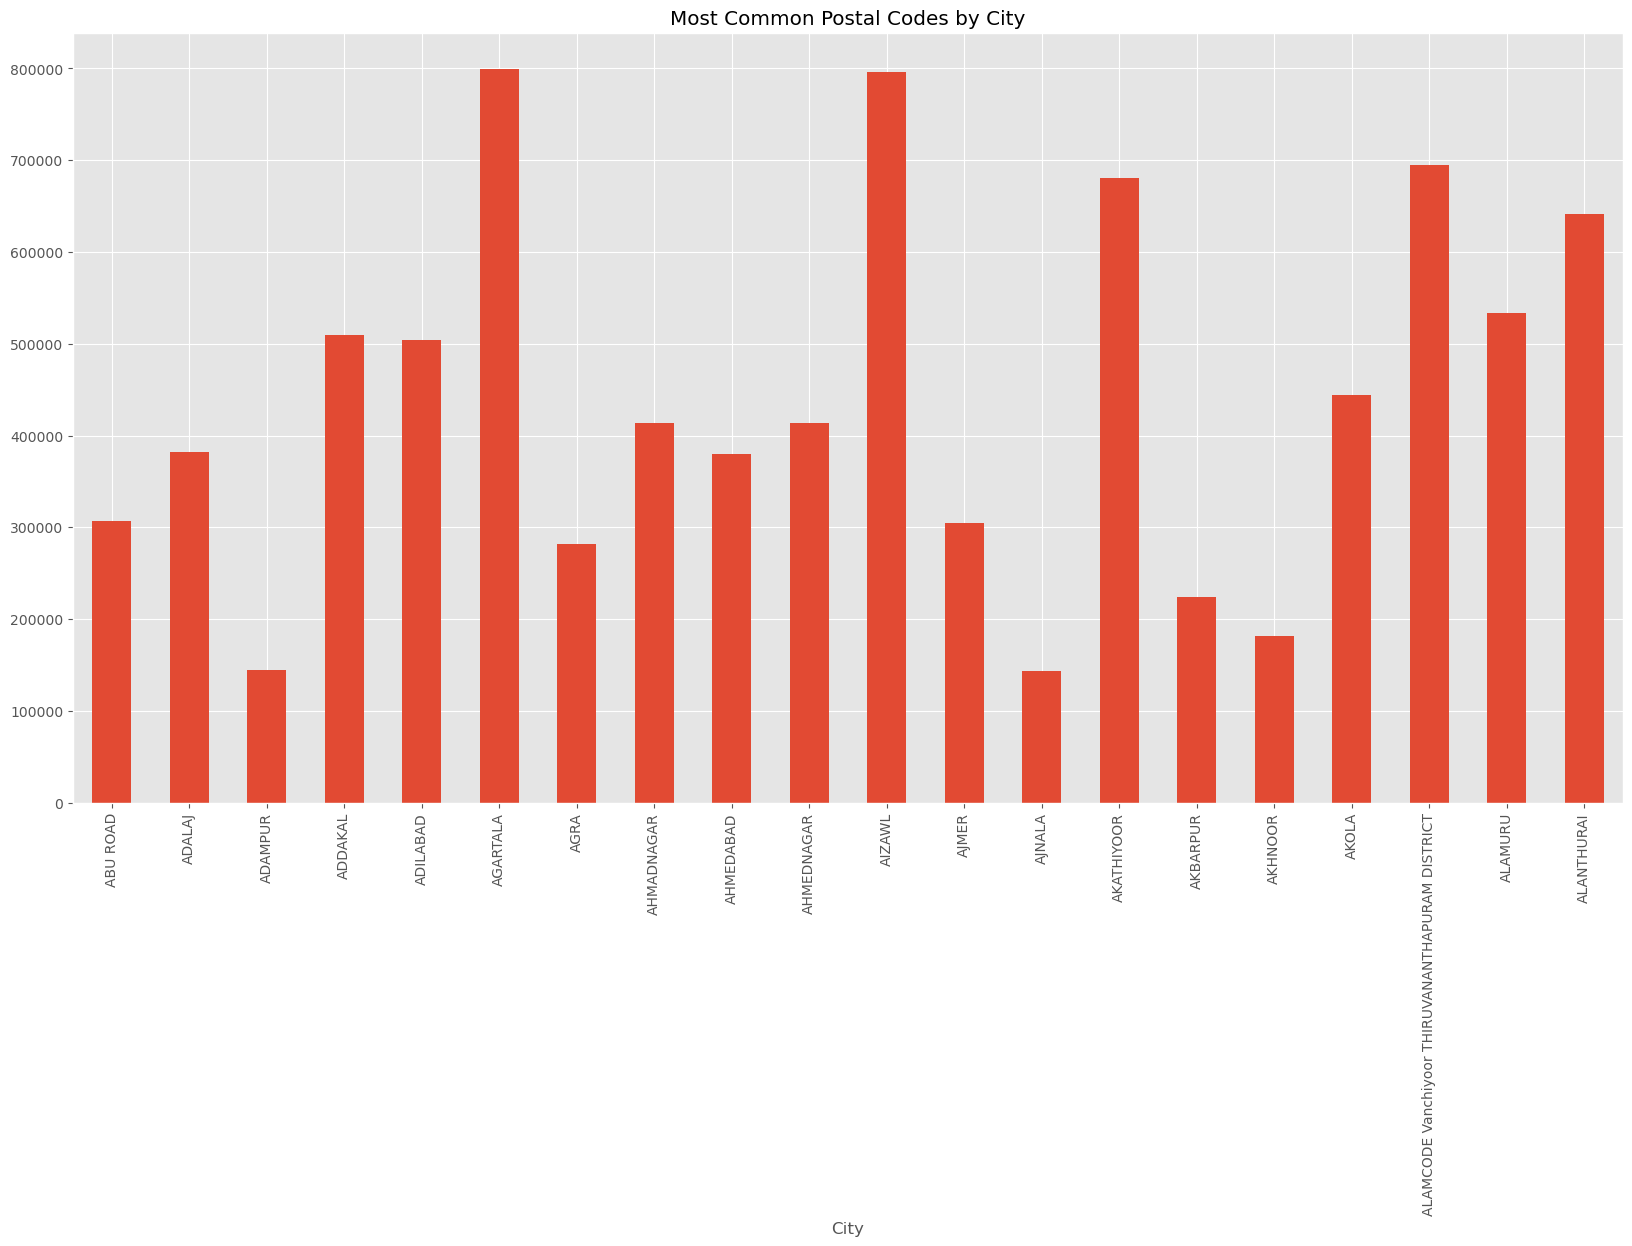

In [101]:
plt.figure(figsize=(20,10))
common_postal_codes = df.groupby('City')['Postal-Code'].agg(lambda x: x.value_counts().idxmax()).head(20)
common_postal_codes.plot(kind='bar', title='Most Common Postal Codes by City')
plt.show()

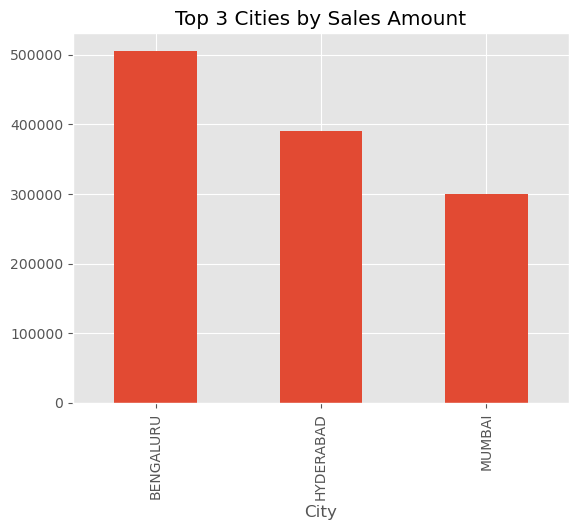

In [104]:

top_cities_sales = df.groupby('City')['Amount'].sum().nlargest(3)
top_cities_sales.plot(kind='bar', title='Top 3 Cities by Sales Amount')
plt.show()

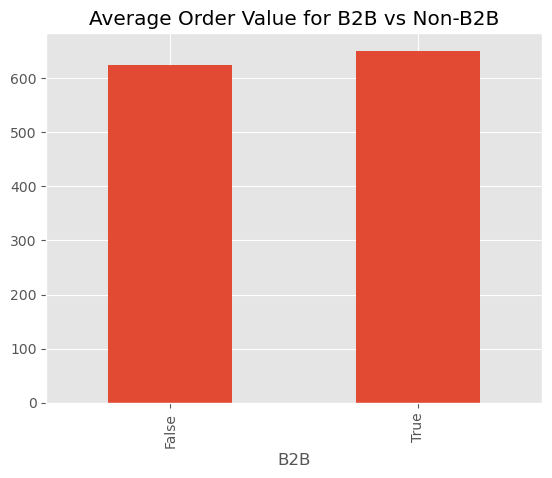

In [106]:

avg_order_value_b2b = df.groupby('B2B')['Amount'].mean()
avg_order_value_b2b.plot(kind='bar', title='Average Order Value for B2B vs Non-B2B')
plt.show()

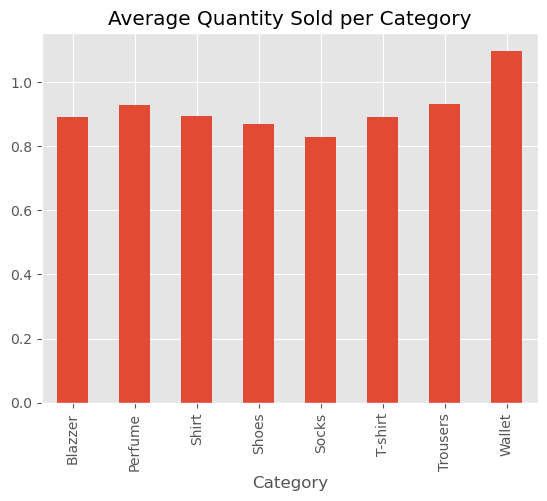

In [108]:

avg_quantity_by_category = df.groupby('Category')['Qty'].mean()
avg_quantity_by_category.plot(kind='bar', title='Average Quantity Sold per Category')
plt.show()

In [111]:
#  23. Percentage of orders from returning customers
# Assuming there's a way to identify returning customers
returning_customers = df[df['Order ID'].duplicated(keep=False)]
percentage_returning = (returning_customers['Order ID'].count() / df['Order ID'].count()) * 100
print(f'Percentage of Returning Customers: {percentage_returning:.2f}%')

Percentage of Returning Customers: 13.93%


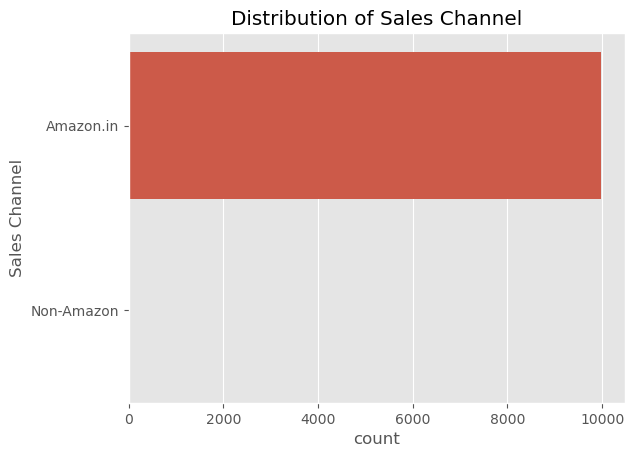

In [112]:
# 25. Distribution of Sales Channel
sns.countplot(y='Sales Channel', data=df)
plt.title('Distribution of Sales Channel')
plt.show()

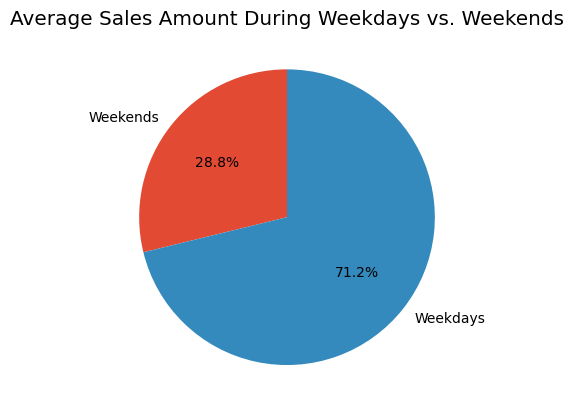

In [124]:
# 26. Average sales amount during weekends vs. weekdays
df['Weekday'] = df['Date'].dt.day_name()
avg_sales_weekdays = df.groupby('Weekday')['Amount'].mean()
weekend_days = ['Saturday', 'Sunday']
weekend_sales = avg_sales_weekdays[avg_sales_weekdays.index.isin(weekend_days)].sum()
weekday_sales = avg_sales_weekdays[~avg_sales_weekdays.index.isin(weekend_days)].sum()
sales_data = pd.Series([weekend_sales, weekday_sales], index=['Weekends', 'Weekdays'])
sales_data.plot(kind='pie', title='Average Sales Amount During Weekdays vs. Weekends', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  
plt.show()



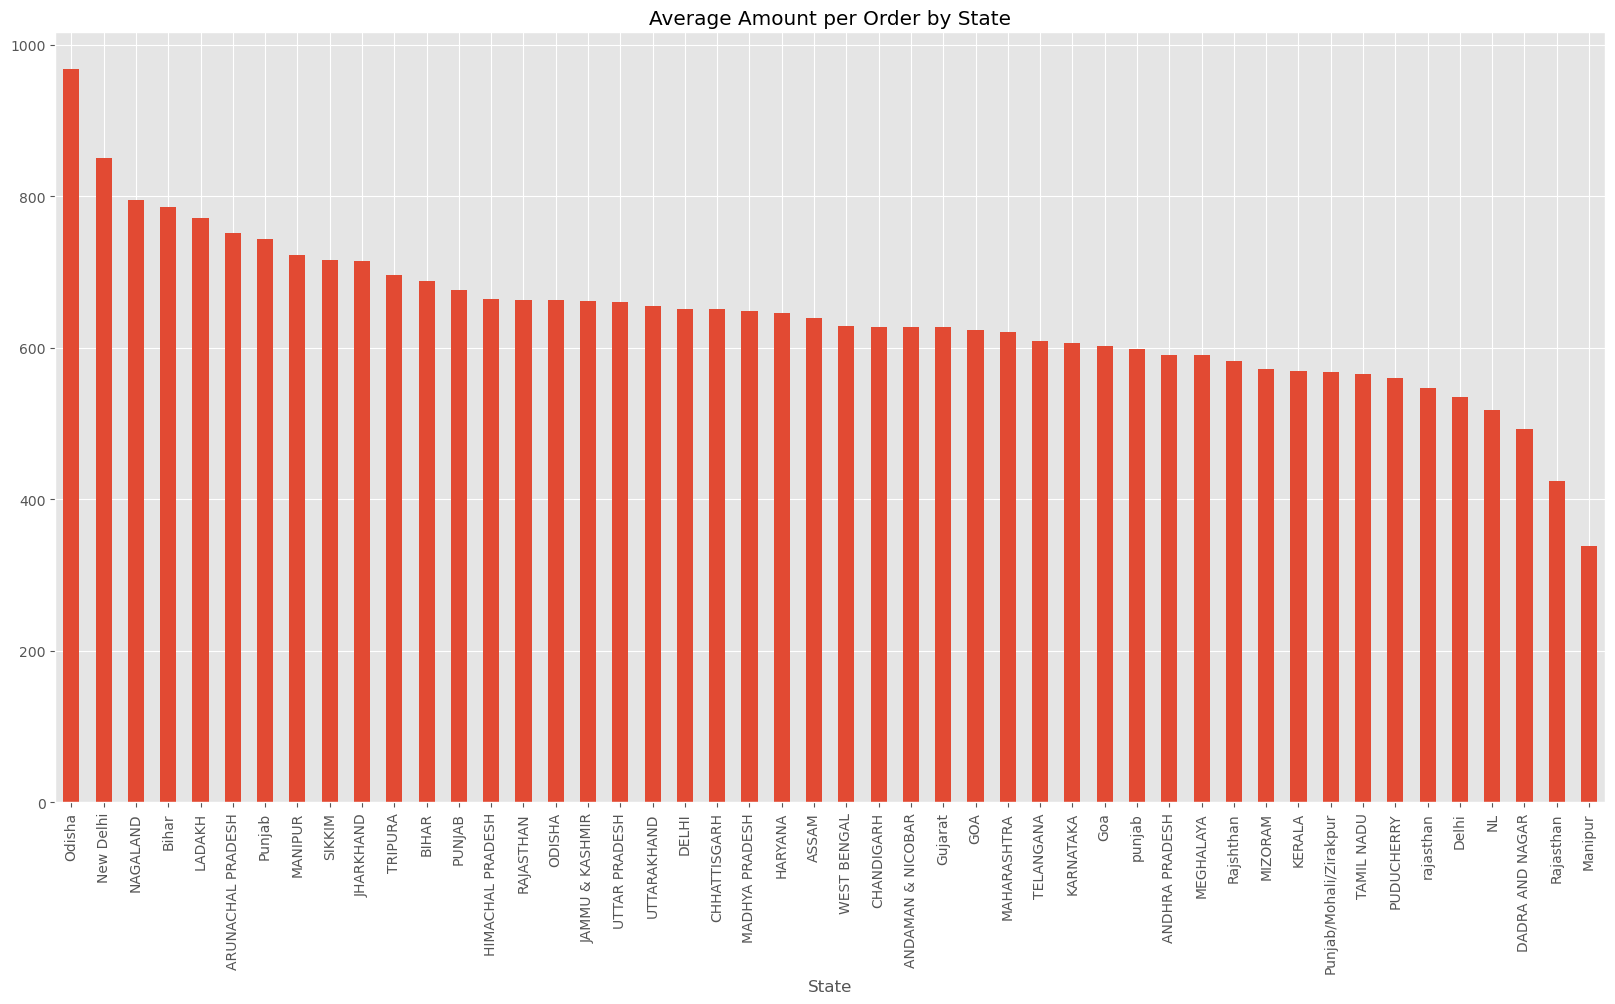

In [122]:
# 30. Average amount per order across different states
plt.figure(figsize=(20,10))
avg_order_value_states = df.groupby('State')['Amount'].mean().sort_values(ascending=False)
avg_order_value_states.plot(kind='bar', title='Average Amount per Order by State')
plt.show()

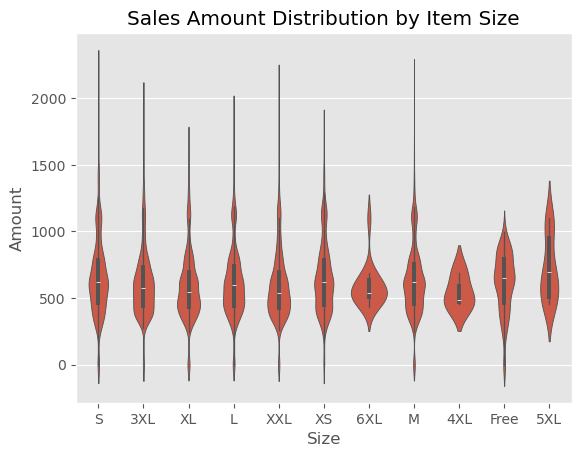

In [131]:
sns.violinplot(x='Size', y='Amount', data=df)
plt.title('Sales Amount Distribution by Item Size')
plt.show()


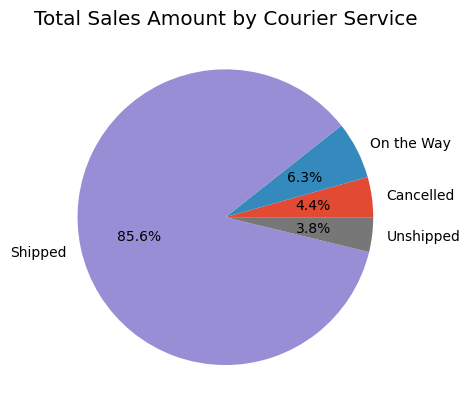

In [134]:
total_sales_per_courier = df.groupby('Courier Status')['Amount'].sum()
total_sales_per_courier.plot(kind='pie', title='Total Sales Amount by Courier Service', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


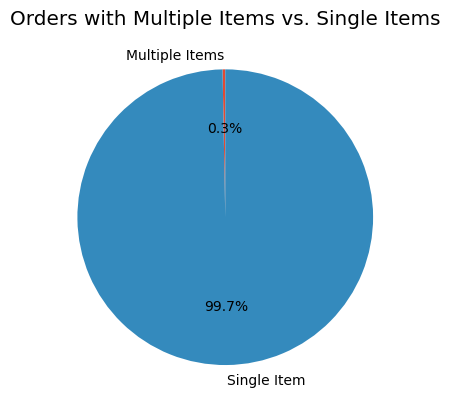

In [139]:
multiple_items_orders = df[df['Qty'] > 1].shape[0]
single_item_orders = df[df['Qty'] == 1].shape[0]
plt.pie([multiple_items_orders, single_item_orders], labels=['Multiple Items', 'Single Item'], autopct='%1.1f%%', startangle=90)
plt.gca().set(aspect='equal')  # Equal aspect ratio ensures the pie is circular
plt.title('Orders with Multiple Items vs. Single Items')
plt.show()


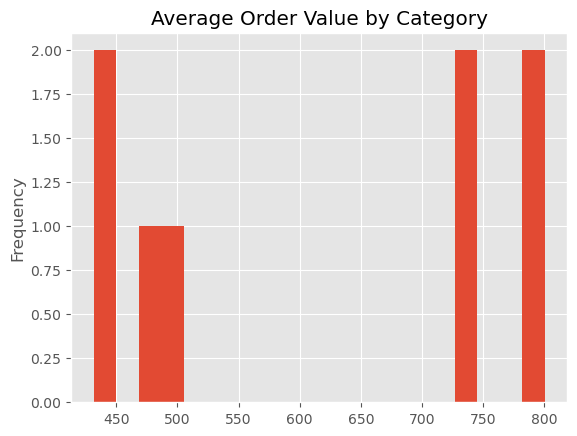

In [141]:
avg_order_value_by_category = df.groupby('Category')['Amount'].mean()
avg_order_value_by_category.plot(kind='hist', bins=20, title='Average Order Value by Category')
plt.show()


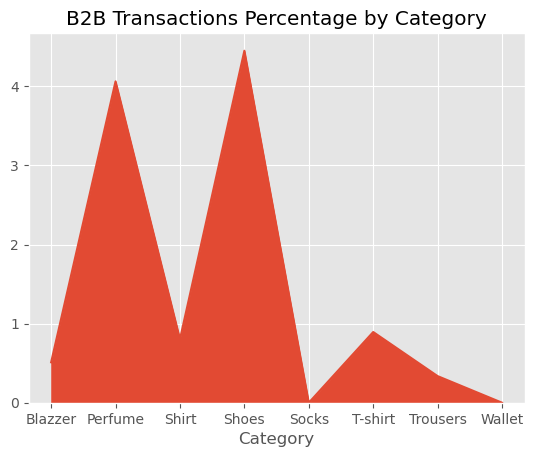

In [142]:
b2b_sales = df[df['B2B'] == True].groupby('Category')['Amount'].sum()
non_b2b_sales = df[df['B2B'] == False].groupby('Category')['Amount'].sum()
total_sales = b2b_sales + non_b2b_sales
b2b_percentage = (b2b_sales / total_sales) * 100
b2b_percentage.plot(kind='area', title='B2B Transactions Percentage by Category')
plt.show()


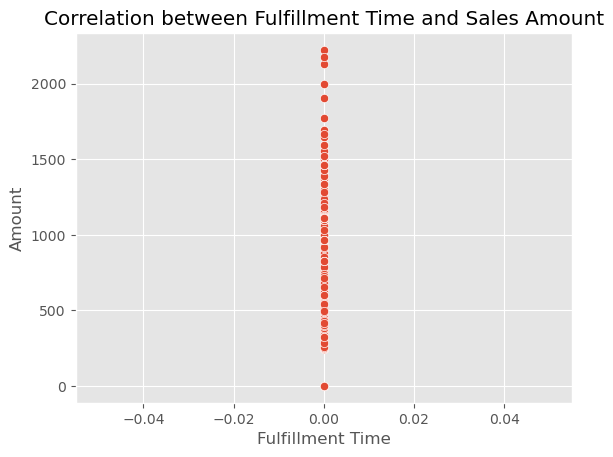

In [186]:
sns.scatterplot(x='Fulfillment Time', y='Amount', data=df)
plt.title('Correlation between Fulfillment Time and Sales Amount')
plt.show()


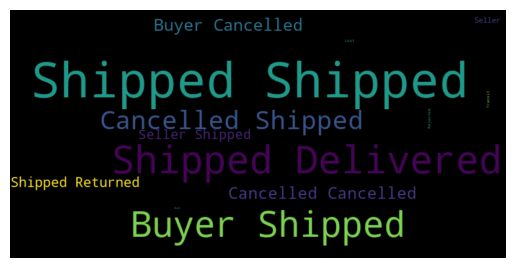

In [148]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['Status'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


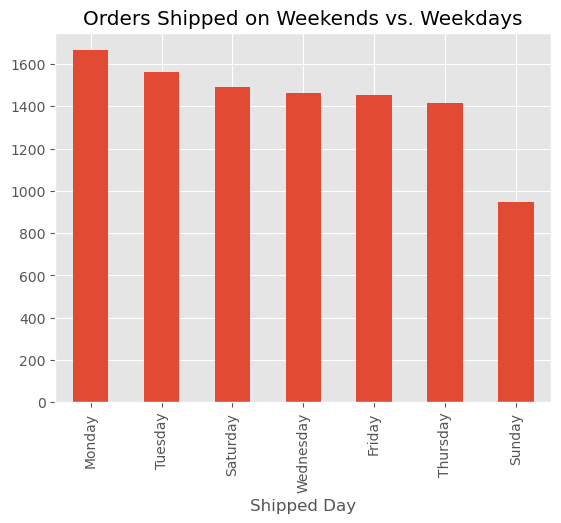

In [156]:
df['Shipped Day'] = df['Date'].dt.day_name()
shipped_days_count = df['Shipped Day'].value_counts()
shipped_days_count.plot(kind='bar', stacked=True, title='Orders Shipped on Weekends vs. Weekdays')
plt.show()


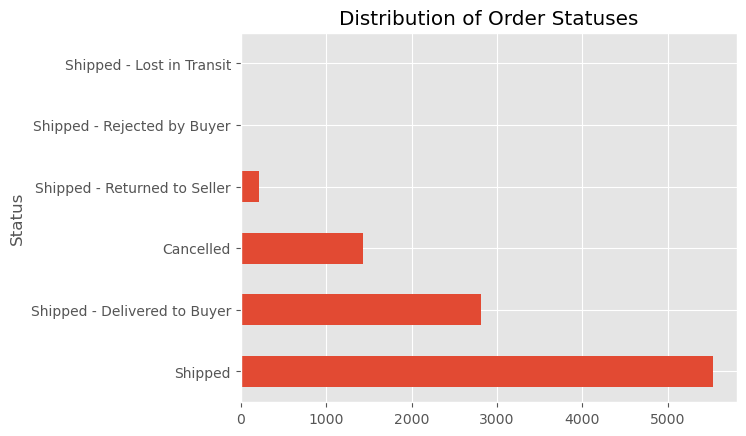

In [157]:
status_distribution = df['Status'].value_counts()
status_distribution.plot(kind='barh', title='Distribution of Order Statuses')
plt.show()


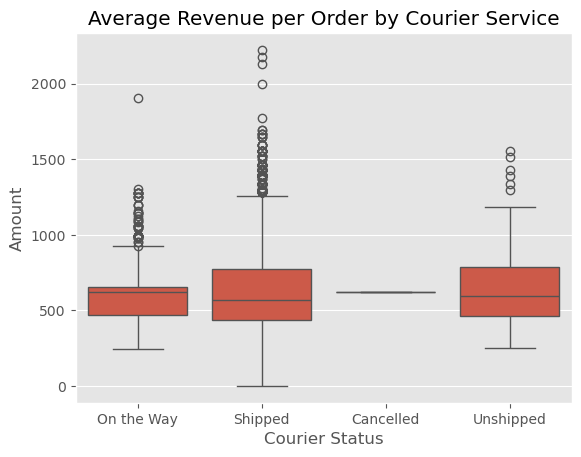

In [166]:
sns.boxplot(x='Courier Status', y='Amount', data=df)
plt.title('Average Revenue per Order by Courier Service')
plt.show()


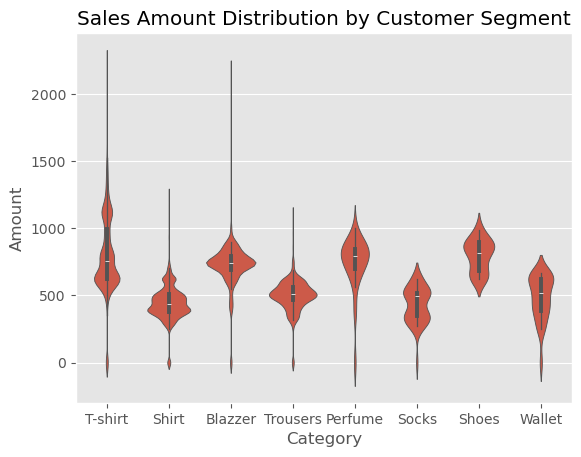

In [174]:
sns.violinplot(x='Category', y='Amount', data=df)
plt.title('Sales Amount Distribution by Customer Segment')
plt.show()


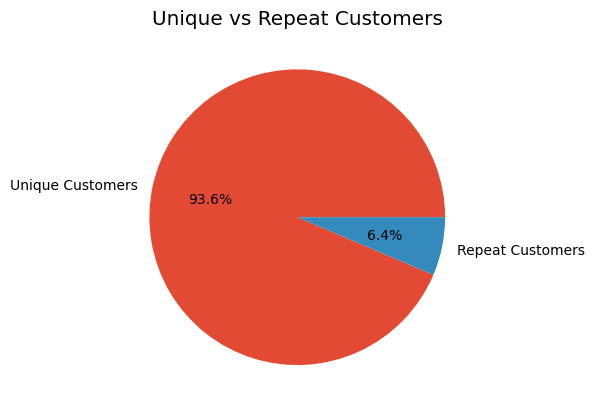

In [177]:
unique_customers_count = df['Order ID'].nunique()
repeat_customers_count = df[df.duplicated(subset='Order ID')]['Order ID'].nunique()
plt.pie([unique_customers_count, repeat_customers_count], labels=['Unique Customers', 'Repeat Customers'], autopct='%1.1f%%')
plt.title('Unique vs Repeat Customers')
plt.show()
